<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/PILOTO_CALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
""" Voy a configurar un algoritmo para que me de la ultima fecha de visita y los kilometros correspondientes por cliente, junto con diferentes datos del cliente. 
prescindiré de mucho codigo de debajo que esta preparado para COHORT""" 

' Voy a configurar un algoritmo para que me de la ultima fecha de visita y los kilometros correspondientes por cliente, junto con diferentes datos del cliente. \nprescindiré de mucho codigo de debajo que esta preparado para COHORT'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:


xlsx = pd.ExcelFile("/content/drive/MyDrive/Colab Notebooks/CONSULTA_PILOTO_CALL.xlsx") # ESTE EL NOMBRE DE LA RUTA. 
df = pd.read_excel(xlsx, "TOTAL_BASE_DATOS_PILOTO" ) # ESTE EL NOMBRE DE LA PESTAÑA. 
# he descargado el archivo en google drive para no tener que estar cargarlo cada vez que lo utilice. 


In [4]:
pd.options.display.max_columns = 0 # con esto n olimitamos que se vean todas las columnas a lo ancho

In [5]:
df.head()

,Cta.ti,Nombre titular,DNI/CIF,Movil,Teléfono,E-mail,Bastidor,Matricula,F.matric,Mar,Dirección,C.P.,Localidad,Marca/modelo,Cta.cargo,Nombre,DNI/CIF_1,Fec.aper,F.cierre,Km,Número,ORDEN_CORTA
0,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610622,POLITICA COMERCIAL VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382570,838257
1,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610681,LAVADOS DE VEH. CLI MECANICA,NaN,2015-12-01,2015-12-30,13,8382570,838257
2,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610622,POLITICA COMERCIAL VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382700,838270
3,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610621,GASTOS PREENTREGA VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382700,838270
4,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610662,GASTOS ASUMIDOS POR TALLER,NaN,2015-12-01,2015-12-30,13,8382700,838270


In [6]:
df.columns

Index(['Cta.ti', 'Nombre titular', 'DNI/CIF', 'Movil', 'Teléfono', 'E-mail',
       'Bastidor', 'Matricula', 'F.matric', 'Mar', 'Dirección', 'C.P.',
       'Localidad', 'Marca/modelo', 'Cta.cargo', 'Nombre', 'DNI/CIF_1',
       'Fec.aper', 'F.cierre', 'Km', 'Número', 'ORDEN_CORTA'],
      dtype='object')

In [51]:
# voy a cambiar el nombre de algunas columnas. 
df = df.rename(columns={"Cta.ti":"Cta_ti", "Nombre Titular":"Nombre_Titular", "DNI/CIF":"DNI_CIF","Teléfono":"Telefono", "E-mail":"Email", "F.matric":"F_matric", 
                   "Mar":"Marca","Dirección":"Direccion", "C.P.":"CP", "Marca/modelo":"Marca_modelo", "Cta.cargo":"Cta_cargo", "DNI/CIF_1": "DNI_CIF_1", "Fec.aper":"Fec_aper",
                   "F.cierre":"F_cierre", "Número":"Numero" })


In [52]:
df.columns

Index(['Cta_ti', 'Nombre titular', 'DNI_CIF', 'Movil', 'Telefono', 'Email',
       'Bastidor', 'Matricula', 'F_matric', 'Marca', 'Direccion', 'CP',
       'Localidad', 'Marca_modelo', 'Cta_cargo', 'Nombre', 'DNI_CIF_1',
       'Fec_aper', 'F_cierre', 'Km', 'Numero', 'ORDEN_CORTA', 'year', 'month',
       'day', 'day_of_week'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290738 entries, 0 to 405658
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Cta_ti          290738 non-null  object        
 1   Nombre titular  290738 non-null  object        
 2   DNI_CIF         290738 non-null  object        
 3   Movil           290738 non-null  object        
 4   Telefono        290738 non-null  object        
 5   Email           290738 non-null  object        
 6   Bastidor        290738 non-null  object        
 7   Matricula       290738 non-null  object        
 8   F_matric        290734 non-null  datetime64[ns]
 9   Marca           290738 non-null  object        
 10  Direccion       290738 non-null  object        
 11  CP              290738 non-null  object        
 12  Localidad       289246 non-null  object        
 13  Marca_modelo    290738 non-null  object        
 14  Cta_cargo       290738 non-null  obj

In [54]:
df.columns

Index(['Cta_ti', 'Nombre titular', 'DNI_CIF', 'Movil', 'Telefono', 'Email',
       'Bastidor', 'Matricula', 'F_matric', 'Marca', 'Direccion', 'CP',
       'Localidad', 'Marca_modelo', 'Cta_cargo', 'Nombre', 'DNI_CIF_1',
       'Fec_aper', 'F_cierre', 'Km', 'Numero', 'ORDEN_CORTA', 'year', 'month',
       'day', 'day_of_week'],
      dtype='object')

In [11]:
# lo primero que voy a hacer es cambiar de tipo de datos. 
df["Cta_ti"] = df["Cta_ti"].apply(str)
df["Movil"] = df["Movil"].apply(str)
df["Telefono"] = df["Telefono"].apply(str)
df["CP"] = df["CP"].apply(str)
df["Numero"] = df["Numero"].apply(str)
df["ORDEN_CORTA"] = df["ORDEN_CORTA"].apply(str)
df.F_matric = pd.to_datetime(df.F_matric)
df.Fec_aper = pd.to_datetime(df.Fec_aper)
df.F_cierre = pd.to_datetime(df.F_cierre)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405662 entries, 0 to 405661
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Cta_ti          405662 non-null  object        
 1   Nombre titular  405662 non-null  object        
 2   DNI_CIF         405662 non-null  object        
 3   Movil           405662 non-null  object        
 4   Telefono        405662 non-null  object        
 5   Email           405662 non-null  object        
 6   Bastidor        405662 non-null  object        
 7   Matricula       405662 non-null  object        
 8   F_matric        405658 non-null  datetime64[ns]
 9   Marca           405662 non-null  object        
 10  Direccion       405662 non-null  object        
 11  CP              405662 non-null  object        
 12  Localidad       289246 non-null  object        
 13  Marca_modelo    405662 non-null  object        
 14  Cta_cargo       290738 non-null  obj

In [13]:
df.head()

,Cta_ti,Nombre titular,DNI_CIF,Movil,Telefono,Email,Bastidor,Matricula,F_matric,Marca,Direccion,CP,Localidad,Marca_modelo,Cta_cargo,Nombre,DNI_CIF_1,Fec_aper,F_cierre,Km,Numero,ORDEN_CORTA
0,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610622,POLITICA COMERCIAL VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382570,838257
1,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610681,LAVADOS DE VEH. CLI MECANICA,NaN,2015-12-01,2015-12-30,13,8382570,838257
2,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610622,POLITICA COMERCIAL VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382700,838270
3,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610621,GASTOS PREENTREGA VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382700,838270
4,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610662,GASTOS ASUMIDOS POR TALLER,NaN,2015-12-01,2015-12-30,13,8382700,838270


In [ ]:
"""df["Fact_total"] = df["Total_Mo"] + df["Recamb"]"""

In [ ]:
"""df.head()"""

In [ ]:
"""# de esta manera lo que hago es quitar el último digito de la variable referencia. 
# lo he hecho para probar como se hace. podría haberlo metido en otra variable y luego meterla en el dataframe para no eliminar información. 
df["Orden_Corta2"] = df.apply(lambda x: x["Referencia"][:-1], axis=1)"""

In [ ]:
"""df.head()"""

In [14]:
df.shape

(405662, 22)

In [15]:
df.isnull().sum() # como podemos veer debajo tenemos 13.698 filas sin fecha de facturación. estas las voy a quitar. Lo haremos mas adelante. 

Cta_ti                 0
Nombre titular         0
DNI_CIF                0
Movil                  0
Telefono               0
Email                  0
Bastidor               0
Matricula              0
F_matric               4
Marca                  0
Direccion              0
CP                     0
Localidad         116416
Marca_modelo           0
Cta_cargo         114924
Nombre                 0
DNI_CIF_1             36
Fec_aper               0
F_cierre               0
Km                     0
Numero                 0
ORDEN_CORTA            0
dtype: int64

In [16]:
df.ORDEN_CORTA.nunique() # este es número total de ordenes cortas, por lo tanto de pasos. 

191699

In [17]:
df.Bastidor.nunique() # tenemos 59107 vehículos bastidores diferentes. 

59107

In [18]:
df.Km.describe() # hay km en negativo, por lo tanto tendría que filtrar > 0

count    405662.000000
mean      69014.674862
std       74084.698955
min      -20000.000000
25%       19651.000000
50%       47468.000000
75%       98666.500000
max      999140.000000
Name: Km, dtype: float64

In [19]:
df.columns

Index(['Cta_ti', 'Nombre titular', 'DNI_CIF', 'Movil', 'Telefono', 'Email',
       'Bastidor', 'Matricula', 'F_matric', 'Marca', 'Direccion', 'CP',
       'Localidad', 'Marca_modelo', 'Cta_cargo', 'Nombre', 'DNI_CIF_1',
       'Fec_aper', 'F_cierre', 'Km', 'Numero', 'ORDEN_CORTA'],
      dtype='object')

In [ ]:
"""df = df[df["Fact_total"]>=0] # quitamos todas las ordenes que sean negativas. 
df.shape"""

In [20]:
print("la fecha va desde {} a {}".format(df.F_cierre.min(), df.F_cierre.max()))

la fecha va desde 2015-01-02 00:00:00 a 2022-06-30 00:00:00


In [21]:
df.Km.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    405662.000000
mean      69014.674862
std       74084.698955
min      -20000.000000
25%       19651.000000
50%       47468.000000
75%       98666.500000
90%      165140.800000
95%      209891.850000
99%      307595.000000
max      999140.000000
Name: Km, dtype: float64

In [22]:
df.Bastidor.nunique() # por ahora después de la limpieza tenemos 58.798 clientes o bastidores. 

59107

In [23]:
df.CP.value_counts(normalize=True) # por numero de lineas, debajo están los pesos. peso por codigo postal. 

28045.0    0.144182
28108.0    0.066065
28703.0    0.040337
28005.0    0.037472
28007.0    0.037290
             ...   
8930.0     0.000002
10700.0    0.000002
48610.0    0.000002
32004.0    0.000002
48619.0    0.000002
Name: CP, Length: 2454, dtype: float64

In [24]:
pd.DataFrame(df.CP.value_counts(normalize=True)) # por numero de lineas, debajo están los pesos. peso por codigo postal. 

,CP
28045.0,0.144182
28108.0,0.066065
28703.0,0.040337
28005.0,0.037472
28007.0,0.037290
...,...
8930.0,0.000002
10700.0,0.000002
48610.0,0.000002
32004.0,0.000002


In [ ]:
"""df.Tipo_Or.nunique() # tenemos 39 tipos de ordenes.""" 

39

In [ ]:
"""# voy a quitar las internas. 
df[df["Tipo_Or"].str.startswith("5" or "6")==True]"""

In [ ]:
"""df = df[df["Tipo_Or"].str.startswith("5" or "6")!=True]"""

In [25]:
df.Bastidor.nunique() # después de haber quitado el interno tenemos 59107 bastidores. 

59107

In [26]:
df.shape # tenemos 274.898 filas

(405662, 22)

In [27]:
df.isnull().sum()

Cta_ti                 0
Nombre titular         0
DNI_CIF                0
Movil                  0
Telefono               0
Email                  0
Bastidor               0
Matricula              0
F_matric               4
Marca                  0
Direccion              0
CP                     0
Localidad         116416
Marca_modelo           0
Cta_cargo         114924
Nombre                 0
DNI_CIF_1             36
Fec_aper               0
F_cierre               0
Km                     0
Numero                 0
ORDEN_CORTA            0
dtype: int64

In [28]:
# vamos a quitar todas las filas que no tengan cuenta de cargo. 
df = df[~df.Cta_cargo.isnull()]
df.shape

(290738, 22)

In [29]:
df.isnull().sum()

Cta_ti               0
Nombre titular       0
DNI_CIF              0
Movil                0
Telefono             0
Email                0
Bastidor             0
Matricula            0
F_matric             4
Marca                0
Direccion            0
CP                   0
Localidad         1492
Marca_modelo         0
Cta_cargo            0
Nombre               0
DNI_CIF_1           35
Fec_aper             0
F_cierre             0
Km                   0
Numero               0
ORDEN_CORTA          0
dtype: int64

In [ ]:
"""# también vamos a quitar todos los que no tienen fecha de facturación. 
df = df[~df.Fecha_Fact.isnull()]
# Tambien quito los que no tengan nombre del titular. 
df = df[~df.Nombre_Titular.isnull()]
df = df[~df.Cta_Titular.isnull()]
df = df[~df.Modelo.isnull()]"""

In [30]:
df.Bastidor.nunique() #58058 bastidores. 

59107

In [31]:
df.info() # 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290738 entries, 0 to 405658
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Cta_ti          290738 non-null  object        
 1   Nombre titular  290738 non-null  object        
 2   DNI_CIF         290738 non-null  object        
 3   Movil           290738 non-null  object        
 4   Telefono        290738 non-null  object        
 5   Email           290738 non-null  object        
 6   Bastidor        290738 non-null  object        
 7   Matricula       290738 non-null  object        
 8   F_matric        290734 non-null  datetime64[ns]
 9   Marca           290738 non-null  object        
 10  Direccion       290738 non-null  object        
 11  CP              290738 non-null  object        
 12  Localidad       289246 non-null  object        
 13  Marca_modelo    290738 non-null  object        
 14  Cta_cargo       290738 non-null  obj

In [32]:
df.isnull().sum()

Cta_ti               0
Nombre titular       0
DNI_CIF              0
Movil                0
Telefono             0
Email                0
Bastidor             0
Matricula            0
F_matric             4
Marca                0
Direccion            0
CP                   0
Localidad         1492
Marca_modelo         0
Cta_cargo            0
Nombre               0
DNI_CIF_1           35
Fec_aper             0
F_cierre             0
Km                   0
Numero               0
ORDEN_CORTA          0
dtype: int64

In [33]:
# creating some columns for exploratory


df['year'] = df['F_cierre'].dt.year # sacamos el año de la fecha
df['month'] = df['F_cierre'].dt.month # sacamos el mes
df['day'] = df['F_cierre'].dt.day # sacamos el día. 
df['day_of_week'] = df['F_cierre'].dt.dayofweek # sacamos el día de la semana. 

In [34]:
df.head(2)

,Cta_ti,Nombre titular,DNI_CIF,Movil,Telefono,Email,Bastidor,Matricula,F_matric,Marca,Direccion,CP,Localidad,Marca_modelo,Cta_cargo,Nombre,DNI_CIF_1,Fec_aper,F_cierre,Km,Numero,ORDEN_CORTA,year,month,day,day_of_week
0,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610622,POLITICA COMERCIAL VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382570,838257,2015,12,30,2
1,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610681,LAVADOS DE VEH. CLI MECANICA,NaN,2015-12-01,2015-12-30,13,8382570,838257,2015,12,30,2


In [ ]:
"""# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Total pasos. ")
        plt.title("Total Pasos", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()"""

In [ ]:
"""# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Suma de Cantidad")
        plt.title("Pasos de taller", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()"""

In [35]:
df.groupby("CP")["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

CP
28045.0    4692
28703.0    4363
28108.0    3065
28007.0    2196
28220.0    2084
           ... 
30310.0       1
30204.0       1
30202.0       1
30201.0       1
30740.0       1
Name: Bastidor, Length: 2454, dtype: int64

In [ ]:
"""df.groupby("Tall")["Fact_total"].sum().sort_values(ascending=False) # aqui estoy agrupando por taller y facturación total. """

In [36]:
df.groupby( "year")["Bastidor"].nunique().sort_values(ascending=False) # BASTIDORES UNICOS POR AÑO. 

year
2018    18989
2019    18768
2017    18477
2021    17687
2020    16810
2016    16196
2015    14681
2022    10556
Name: Bastidor, dtype: int64

In [ ]:
"""# si quiero agrupar por mas de una variable se hace así. 
df.groupby(["Tall", "year"])["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. """

In [ ]:
"""# Looking the distribution of column Quantity
plt.figure(figsize=(10,7)) # fijamos el tamaño del gráfico

skewness = round(df.Fact_total.skew(),2) # calculamos el skewness
kurtosis = round(df.Fact_total.kurtosis(),2) # calculamos la kurtosis
mean = round(np.mean(df.Fact_total),0) # calculamos la media
median = np.median(df.Fact_total) # calculamos la mediana. 

plt.subplot(2,2,1) # esto quieres decir un grafico de 2 x 2 y este ira en 0.0 primera fila primera columna. 
sns.boxplot(y=df.Fact_total)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))
# le estamos metindo una descripción

plt.subplot(2,2,2)
sns.boxplot(y=df[df.Fact_total<500]['Fact_total'])
plt.title('Distribution when Fact_total<500')

plt.subplot(2,2,3)
sns.boxplot(y=df[df.Fact_total<250]['Fact_total'])
plt.title('Distribution when Fact_total<250')

plt.subplot(2,2,4)
sns.boxplot(y=df[df.Fact_total<50]['Fact_total'])
plt.title('Distribution when Fact_total<50')

plt.show()

# estamos trabajando con la cantidad y la analizamos desde diferentes rangos la facturación total. """

In [ ]:
"""# vamos a quitar todos los totales superiores a 5.000
df = df[df["Fact_total"]<5000]"""


In [ ]:
"""plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).values, # agrupamos por taller y facturación total
            x = df.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).index, 
            color='green')

plt.ylabel('Facturacion')
plt.xlabel('Talleres')
plt.xticks(rotation=45)
plt.title('Venta por Talleres',size=15)

plt.subplot(1,2,2)
sns.barplot(y = df.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).values, # agrupamos por taller y media de facturación por paso
            x = df.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).index, 
            color='green')
# en este lo que hacemos es hayar valores unicos de numero de factura. 
plt.ylabel('Media')
plt.xlabel('Venta de Talleres')
plt.xticks(rotation=45)
plt.title('Media de venta por paso',size=15)

plt.show()"""

In [ ]:
"""df.Fact_total.mean() # esta es la media de todos los valores. """

368.56075385024815

In [ ]:
"""print(df[df["Tall"]=="1"]["Fact_total"].mean())
print(df[df["Tall"]=="6"]["Fact_total"].mean())
print(df[df["Tall"]=="3"]["Fact_total"].mean())
print(df[df["Tall"]=="2"]["Fact_total"].mean())
print(df[df["Tall"]=="10"]["Fact_total"].mean())
print(df[df["Tall"]=="8"]["Fact_total"].mean())"""

In [ ]:
"""plt.figure(figsize=(12,12))
df[df['Tall']=='1'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()"""

In [ ]:
"""plt.figure(figsize=(12,5))
df[df['Tall']=='1'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each year', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022])
plt.legend(fontsize=12)
plt.show()"""

In [ ]:
"""# ahora hacemos lo mismo pero lo vamos a ver por día de la semana. 

plt.figure(figsize=(12,12))
df[df['Tall']=='1'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each day for an year', size=15)
plt.legend(fontsize=12)
plt.show()"""

In [ ]:
# ahora hacemos lo mismo pero por mes
"""
plt.figure(figsize=(12,12))
df[df['Tall']=='1'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)
plt.show()"""

In [ ]:
# ahora hacemos lo mismo pero por mes
"""
plt.figure(figsize=(12,12))
df[df['Tall']=='1'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df[df['Tall']=='2'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df[df['Tall']=='3'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df[df['Tall']=='6'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('DAY',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for day of month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.legend(fontsize=12)
plt.show()"""

In [37]:
df2 = df.copy()

In [38]:
df2.head(2)

,Cta_ti,Nombre titular,DNI_CIF,Movil,Telefono,Email,Bastidor,Matricula,F_matric,Marca,Direccion,CP,Localidad,Marca_modelo,Cta_cargo,Nombre,DNI_CIF_1,Fec_aper,F_cierre,Km,Numero,ORDEN_CORTA,year,month,day,day_of_week
0,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610622,POLITICA COMERCIAL VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382570,838257,2015,12,30,2
1,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610681,LAVADOS DE VEH. CLI MECANICA,NaN,2015-12-01,2015-12-30,13,8382570,838257,2015,12,30,2


- ME VOY A CENTRAR EN SACAR LA FECHA ULTIMA PARA EL PILOTO DEL CALL CENTER ASÍ COMO LOS KM MÁXIMOS. 

ESTA DESCRIPCION NO VALE PARA ESTE EJERCICIO. 
"""- vamos a crear tres columnas nuevas. 
    - Invoice Month. representa el string el mes y año de una factura concreta. 
    - Cohort Month. representa el string el año y el mes de la primera compra de cada cliente. 
    - Cohort Period. representa el string del ciclo de vida del cliente. el numero de meses representa el numero de meses desde la primera compra.""" 

In [58]:
df2.columns

Index(['Cta_ti', 'Nombre titular', 'DNI_CIF', 'Movil', 'Telefono', 'Email',
       'Bastidor', 'Matricula', 'F_matric', 'Marca', 'Direccion', 'CP',
       'Localidad', 'Marca_modelo', 'Cta_cargo', 'Nombre', 'DNI_CIF_1',
       'Fec_aper', 'F_cierre', 'Km', 'Numero', 'ORDEN_CORTA', 'year', 'month',
       'day', 'day_of_week'],
      dtype='object')

In [39]:
# aqui lo que hacemos es crear una nueva variable, que le voy a llamar Nueva_fecha la cual va a ser la misma que la F_cierre pero poniendo todos los días a 1

df2['Nueva_fecha'] = df2['F_cierre'].dt.strftime('%Y-%m') # lo convierte en formato strftime. Estamos poniendo todas las fecha a día 1
# luego en formato fecha. 
# converting the variable to datetime format
df2['Nueva_fecha'] = pd.to_datetime(df2['Nueva_fecha'])

In [40]:
df2.Nueva_fecha

0        2015-12-01
1        2015-12-01
2        2015-12-01
3        2015-12-01
4        2015-12-01
            ...    
405653   2022-01-01
405654   2022-01-01
405655   2022-01-01
405657   2022-01-01
405658   2022-01-01
Name: Nueva_fecha, Length: 290738, dtype: datetime64[ns]

In [41]:
df2.head(2)

,Cta_ti,Nombre titular,DNI_CIF,Movil,Telefono,Email,Bastidor,Matricula,F_matric,Marca,Direccion,CP,Localidad,Marca_modelo,Cta_cargo,Nombre,DNI_CIF_1,Fec_aper,F_cierre,Km,Numero,ORDEN_CORTA,year,month,day,day_of_week,Nueva_fecha
0,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610622,POLITICA COMERCIAL VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382570,838257,2015,12,30,2,2015-12-01
1,28013.0,JARMAUTO SA,A78483294,649891168.0,915304406.0,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045.0,MADRID,AU A-2 1.4 75CV,610681,LAVADOS DE VEH. CLI MECANICA,NaN,2015-12-01,2015-12-30,13,8382570,838257,2015,12,30,2,2015-12-01


In [ ]:
"""# creating the second variable 'Cohort Month'
# getting the first time purchase date for each customer

df_cohort['CohortMonth'] = df_cohort.groupby('Bastidor')['InvoiceMonth'].transform('min') # aqui saca la primera compra. 
# converting the variable to datetime format
df_cohort['CohortMonth'] = pd.to_datetime(df_cohort['CohortMonth'])"""

In [61]:
from pandas.core.groupby import groupby
# voy a crear una nueva variale Fecha_Max con la que voy a extraer la fecha máxima de cada bastidor
df2["Fecha_Max"] = df2.groupby("Bastidor")["F_cierre"].transform("max") # ya con esto tengo la fecha máxima de cada bastidor. 
df2["Km_max"] = df2.groupby("Bastidor")["Km"].transform("max")
# si ahora lo cruzara con cualquier base de datos, tendré siempre la fecha máxima o ultima en la que ha venido. 
df2.head(10)

,Cta_ti,Nombre titular,DNI_CIF,Movil,Telefono,Email,Bastidor,Matricula,F_matric,Marca,Direccion,CP,Localidad,Marca_modelo,Cta_cargo,Nombre,DNI_CIF_1,Fec_aper,F_cierre,Km,Numero,ORDEN_CORTA,year,month,day,day_of_week,Nueva_fecha,Fecha_Max,Km_max
0,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610622,POLITICA COMERCIAL VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382570,838257,2015,12,30,2,2015-12-01,2022-06-30,960303
1,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610681,LAVADOS DE VEH. CLI MECANICA,NaN,2015-12-01,2015-12-30,13,8382570,838257,2015,12,30,2,2015-12-01,2022-06-30,960303
2,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610622,POLITICA COMERCIAL VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382700,838270,2015,12,30,2,2015-12-01,2022-06-30,960303
3,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610621,GASTOS PREENTREGA VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382700,838270,2015,12,30,2,2015-12-01,2022-06-30,960303
4,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610662,GASTOS ASUMIDOS POR TALLER,NaN,2015-12-01,2015-12-30,13,8382700,838270,2015,12,30,2,2015-12-01,2022-06-30,960303
5,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610672,GOLPES DADOS POR EL PERSONAL,NaN,2015-12-01,2015-12-30,13,8382700,838270,2015,12,30,2,2015-12-01,2022-06-30,960303
6,98907,PRUNEDA PUERTAS ROBERTO,20255784Y,609028727,609028727,ROBERPRU@GMAIL.COM,WVWZZZAUZFW070402,4161HZJ,2014-09-26,VW,CL EROS 7 B 2º F,28045,MADRID,VW GOLF ADVANCE,610662,GASTOS ASUMIDOS POR TALLER,NaN,2015-12-15,2015-12-30,57026,8383840,838384,2015,12,30,2,2015-12-01,2016-08-19,90647
7,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610623,OTR.GTOS.INTER.VARIAB.VN AUDI.,NaN,2015-12-01,2015-12-30,13,8384520,838452,2015,12,30,2,2015-12-01,2022-06-30,960303
8,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610671,ROTURA DE PIEZAS POR TALLER,NaN,2015-12-01,2015-12-30,13,8384520,838452,2015,12,30,2,2015-12-01,2022-06-30,960303
9,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610666,GASTOS ROPA PERSONAL,NaN,2015-12-01,2015-12-30,13,8384520,838452,2015,12,30,2,2015-12-01,2022-06-30,960303


In [43]:
df2["Cta_ti"] = df2.apply(lambda x: x["Cta_ti"][:-2], axis=1) # con esto lo que estoy haciendo es quitar dos caracteres a la derecha del string de Cta_ti

In [45]:
df2["Movil"] = df2.apply(lambda x: x["Movil"][:-2], axis=1) # le quito dos caracteres a Movil
df2["Telefono"] = df2.apply(lambda x: x["Telefono"][:-2], axis=1) # le quito dos caracteres a Telefono
df2["CP"] = df2.apply(lambda x: x["CP"][:-2], axis=1) # le quito dos caracteres a CP


In [46]:
df2.head(5)

,Cta_ti,Nombre titular,DNI_CIF,Movil,Telefono,Email,Bastidor,Matricula,F_matric,Marca,Direccion,CP,Localidad,Marca_modelo,Cta_cargo,Nombre,DNI_CIF_1,Fec_aper,F_cierre,Km,Numero,ORDEN_CORTA,year,month,day,day_of_week,Nueva_fecha,Fecha_Max
0,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610622,POLITICA COMERCIAL VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382570,838257,2015,12,30,2,2015-12-01,2022-06-30
1,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610681,LAVADOS DE VEH. CLI MECANICA,NaN,2015-12-01,2015-12-30,13,8382570,838257,2015,12,30,2,2015-12-01,2022-06-30
2,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610622,POLITICA COMERCIAL VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382700,838270,2015,12,30,2,2015-12-01,2022-06-30
3,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610621,GASTOS PREENTREGA VN AUDI.,NaN,2015-12-01,2015-12-30,13,8382700,838270,2015,12,30,2,2015-12-01,2022-06-30
4,28013,JARMAUTO SA,A78483294,649891168,915304406,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,AU,STA. MARIA DE LA CABEZA 4,28045,MADRID,AU A-2 1.4 75CV,610662,GASTOS ASUMIDOS POR TALLER,NaN,2015-12-01,2015-12-30,13,8382700,838270,2015,12,30,2,2015-12-01,2022-06-30


In [47]:
df2.to_excel("/content/drive/MyDrive/Colab Notebooks/Archivo_Transformado.xlsx")

In [63]:
df2.columns

Index(['Cta_ti', 'Nombre titular', 'DNI_CIF', 'Movil', 'Telefono', 'Email',
       'Bastidor', 'Matricula', 'F_matric', 'Marca', 'Direccion', 'CP',
       'Localidad', 'Marca_modelo', 'Cta_cargo', 'Nombre', 'DNI_CIF_1',
       'Fec_aper', 'F_cierre', 'Km', 'Numero', 'ORDEN_CORTA', 'year', 'month',
       'day', 'day_of_week', 'Nueva_fecha', 'Fecha_Max', 'Km_max'],
      dtype='object')

In [65]:
mis_columnas = ["Nombre titular", "DNI_CIF", "Movil", "Email", "Bastidor", "Matricula", "F_matric", "Km_max", "Direccion", "CP", "Localidad", "Fecha_Max"] # con esto lo que hago es decidir que columnas quiero que aparezcan y en que orden. 
df2[mis_columnas]

,Nombre titular,DNI_CIF,Movil,Email,Bastidor,Matricula,F_matric,Km_max,Direccion,CP,Localidad,Fecha_Max
0,JARMAUTO SA,A78483294,649891168,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,960303,STA. MARIA DE LA CABEZA 4,28045,MADRID,2022-06-30
1,JARMAUTO SA,A78483294,649891168,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,960303,STA. MARIA DE LA CABEZA 4,28045,MADRID,2022-06-30
2,JARMAUTO SA,A78483294,649891168,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,960303,STA. MARIA DE LA CABEZA 4,28045,MADRID,2022-06-30
3,JARMAUTO SA,A78483294,649891168,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,960303,STA. MARIA DE LA CABEZA 4,28045,MADRID,2022-06-30
4,JARMAUTO SA,A78483294,649891168,WWW.JARMAUTO.ES,TALLER**TALLER***,TALLER,1998-01-01,960303,STA. MARIA DE LA CABEZA 4,28045,MADRID,2022-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...
405653,MATIA GOMEZ LUIS,02916260K,676335133,SAULITO8415@ICLOUD.COM,WAUZZZF32M1041455,2677LLD,2020-11-24,18751,CL JUCAR 17 1 1,28670,VILLAVICIOSA DE ODON,2022-02-08
405654,SUAREZ HIJARRUBIA MARGARITA,01898852H,619815346,marsuhi@gmail.com,WAUZZZ8U0CR030539,9645HJL,2012-03-01,146636,CL MARCELO USERA 170 6º 1,28026,MADRID,2022-05-03
405655,ALD AUTOMOTIVE SA,A80292667,619459994,jorge.alcalaS@aldautomotive.com,WAUZZZFZZNP003794,9780LVR,2021-12-29,2,CTRA POZUELO 32,28220,MAJADAHONDA,2022-01-03
405657,Fernando De Miguel Ruiz-Crespo,50711154H,615988207,ferdemi2000@yahoo.es,WAUZZZFY1J2096786,9222KKM,2018-04-27,59883,C Montesquinza 12,28010,Madrid,2022-02-23


# EN PRINCIPIO AQUI ACABO Y SERÍA SUFICIENTE PARA LO DA LAS LLAMADAS. LO DE DEBAJO NO VALE. 

In [ ]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259269 entries, 0 to 287596
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            259269 non-null  object        
 1   Referencia      259269 non-null  object        
 2   Fecha_Fact      259269 non-null  datetime64[ns]
 3   Fecha_Apertura  259269 non-null  datetime64[ns]
 4   Cta_Cargo       259269 non-null  object        
 5   Nombre_Cliente  259269 non-null  object        
 6   Cta_Titular     259269 non-null  object        
 7   Nombre_Titular  259269 non-null  object        
 8   Recamb          259269 non-null  float64       
 9   Recamb_Pvp      259269 non-null  float64       
 10  Tiemp_Fact      259269 non-null  float64       
 11  Total_Mo        259269 non-null  float64       
 12  Modelo          259269 non-null  object        
 13  Recep           259269 non-null  object        
 14  Matricula       259269 non-null  obj

In [ ]:
# aqui creamos la tercera variable. el periodo cohort. 
# calculamos el numero de meses desde la primera compra a la fecha de la factura. 
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)
    # multiplica * 12 para convertir la diferencia en años en meses. luego le suma los meses del ultimo año. 

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'], df_cohort['CohortMonth'])

In [ ]:
df_cohort.sample(5)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week,InvoiceMonth,CohortMonth,CohortPeriod
261113,1,13250242,2021-10-25,2021-10-15,116,ORDENES DE REPARACION G,180111,RODRIGUEZ SANCHEZ GERMA,0.00,0.00,0.40,28.81,Audi A4 S,294,3171KKT,WAUZZZF49JA058984,4A GARANTIA MECAN AUDI,nan,10,2021,10,1325024,28.81,1325024,2021,10,15,4,2021-10-01,2019-10-01,24
83485,2,9659631,2017-06-07,2017-05-30,23931,PORTA YUSTAS PILAR,23931,PORTA YUSTAS PILAR,181.03,362.06,1.39,105.64,GOLF 1.8 T,85,M9582WS,WVWZZZ1JZXB084062,2V O.R.CLIENT MEC VW,nan,6,2017,8,965963,286.67,965963,2017,5,30,1,2017-05-01,2015-04-01,25
251919,8,13087111,2021-07-06,2021-07-02,610611,GASTOS PREENTREGA VN VW,127,ARVAL SERVICE LEASE SA,29.56,59.46,2.25,108.00,POLO UNITE,620,264815,WVWZZZAWZMY086020,6V O.R. INTER MEC.VW,nan,7,2021,4,1308711,137.56,1308711,2021,7,2,4,2021-07-01,2021-07-01,0
62423,2,9181602,2016-11-30,2016-11-21,98253,MUTUA MADRILEÑA AUTOMO,45740,MONREAL LAZARO JOSE ANG,0.00,0.00,15.50,659.36,GOLF SPORT,294,8274GMV,WVWZZZ1KZ9P493084,7A PRESUPUESTO CH AUDI,nan,11,2016,9,918160,659.36,918160,2016,11,21,0,2016-11-01,2014-12-01,23
160681,6,11245881,2019-03-28,2019-03-01,98253,MUTUA MADRILEÑA AUTOMOV,133438,FRANCOS COGOLLUDO ANA I,1379.14,2934.91,24.43,969.12,AUDI A3 SP,255,5081JHL,WAUZZZ8V3GA023629,7A PRESUPUESTO CH AUDI,nan,3,2019,27,1124588,2348.26,1124588,2019,3,1,4,2019-03-01,2015-07-01,44


In [ ]:
customer_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Bastidor', aggfunc='nunique')
customer_cohort
# aqui lo que hacemos es una pivot table. donde el index son las fechas de Cohort month
# las columnas son el cohort period, los valores son el count de customer id, y con aggfunc le pedimos que sean únicos. 

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,95,96,97,101,103,156,164,167,179,187,194,203,204
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-04-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2005-03-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2012-11-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,444.0,34.0,25.0,16.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01,585.0,24.0,19.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,473.0,22.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- la tabla de arriba representa la retención y la adquisición de nuevos clientes. 
    - Verticalmente la columna 0 representa cuantos clientes hicieron su primera compra por mes o por fecha. 
        - por ejemplo 444 en febrero del 2022 son los nuevos clientes diferentes de la primera fecha que abril del 2004. al siguiente mes fueron 585 nuevos diferentes a abril del 2004 y así sucesivamente. 
    - horizontalmente. la primera columna nos dice cuantos clientes siguen siendo clientes. 
        - ejemplo. de los clientes de febrero del 2022 despues de un mes vinieron 34, al segundo mes repitieron 25 y asi sucesivamente.  

In [ ]:
# Retention table
# lo mismo que lo anterior pero expresado en porcentajes. 

cohort_size = customer_cohort.iloc[:,0] # todas las filas y la primera columna. customer_cohort es la pivot table. 
# cogemos la primera fila 0, porque será el dividendo de todos los calculos
retention = customer_cohort.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
# dividimos todos los valores entre la primera columna que es cohort_size
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 #to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,95,96,97,101,103,156,164,167,179,187,194,203,204
2004-04-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN
2005-03-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,50.0
2012-11-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,100.0,7.7,5.6,3.6,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01,100.0,4.1,3.2,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,100.0,4.7,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,100.0,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


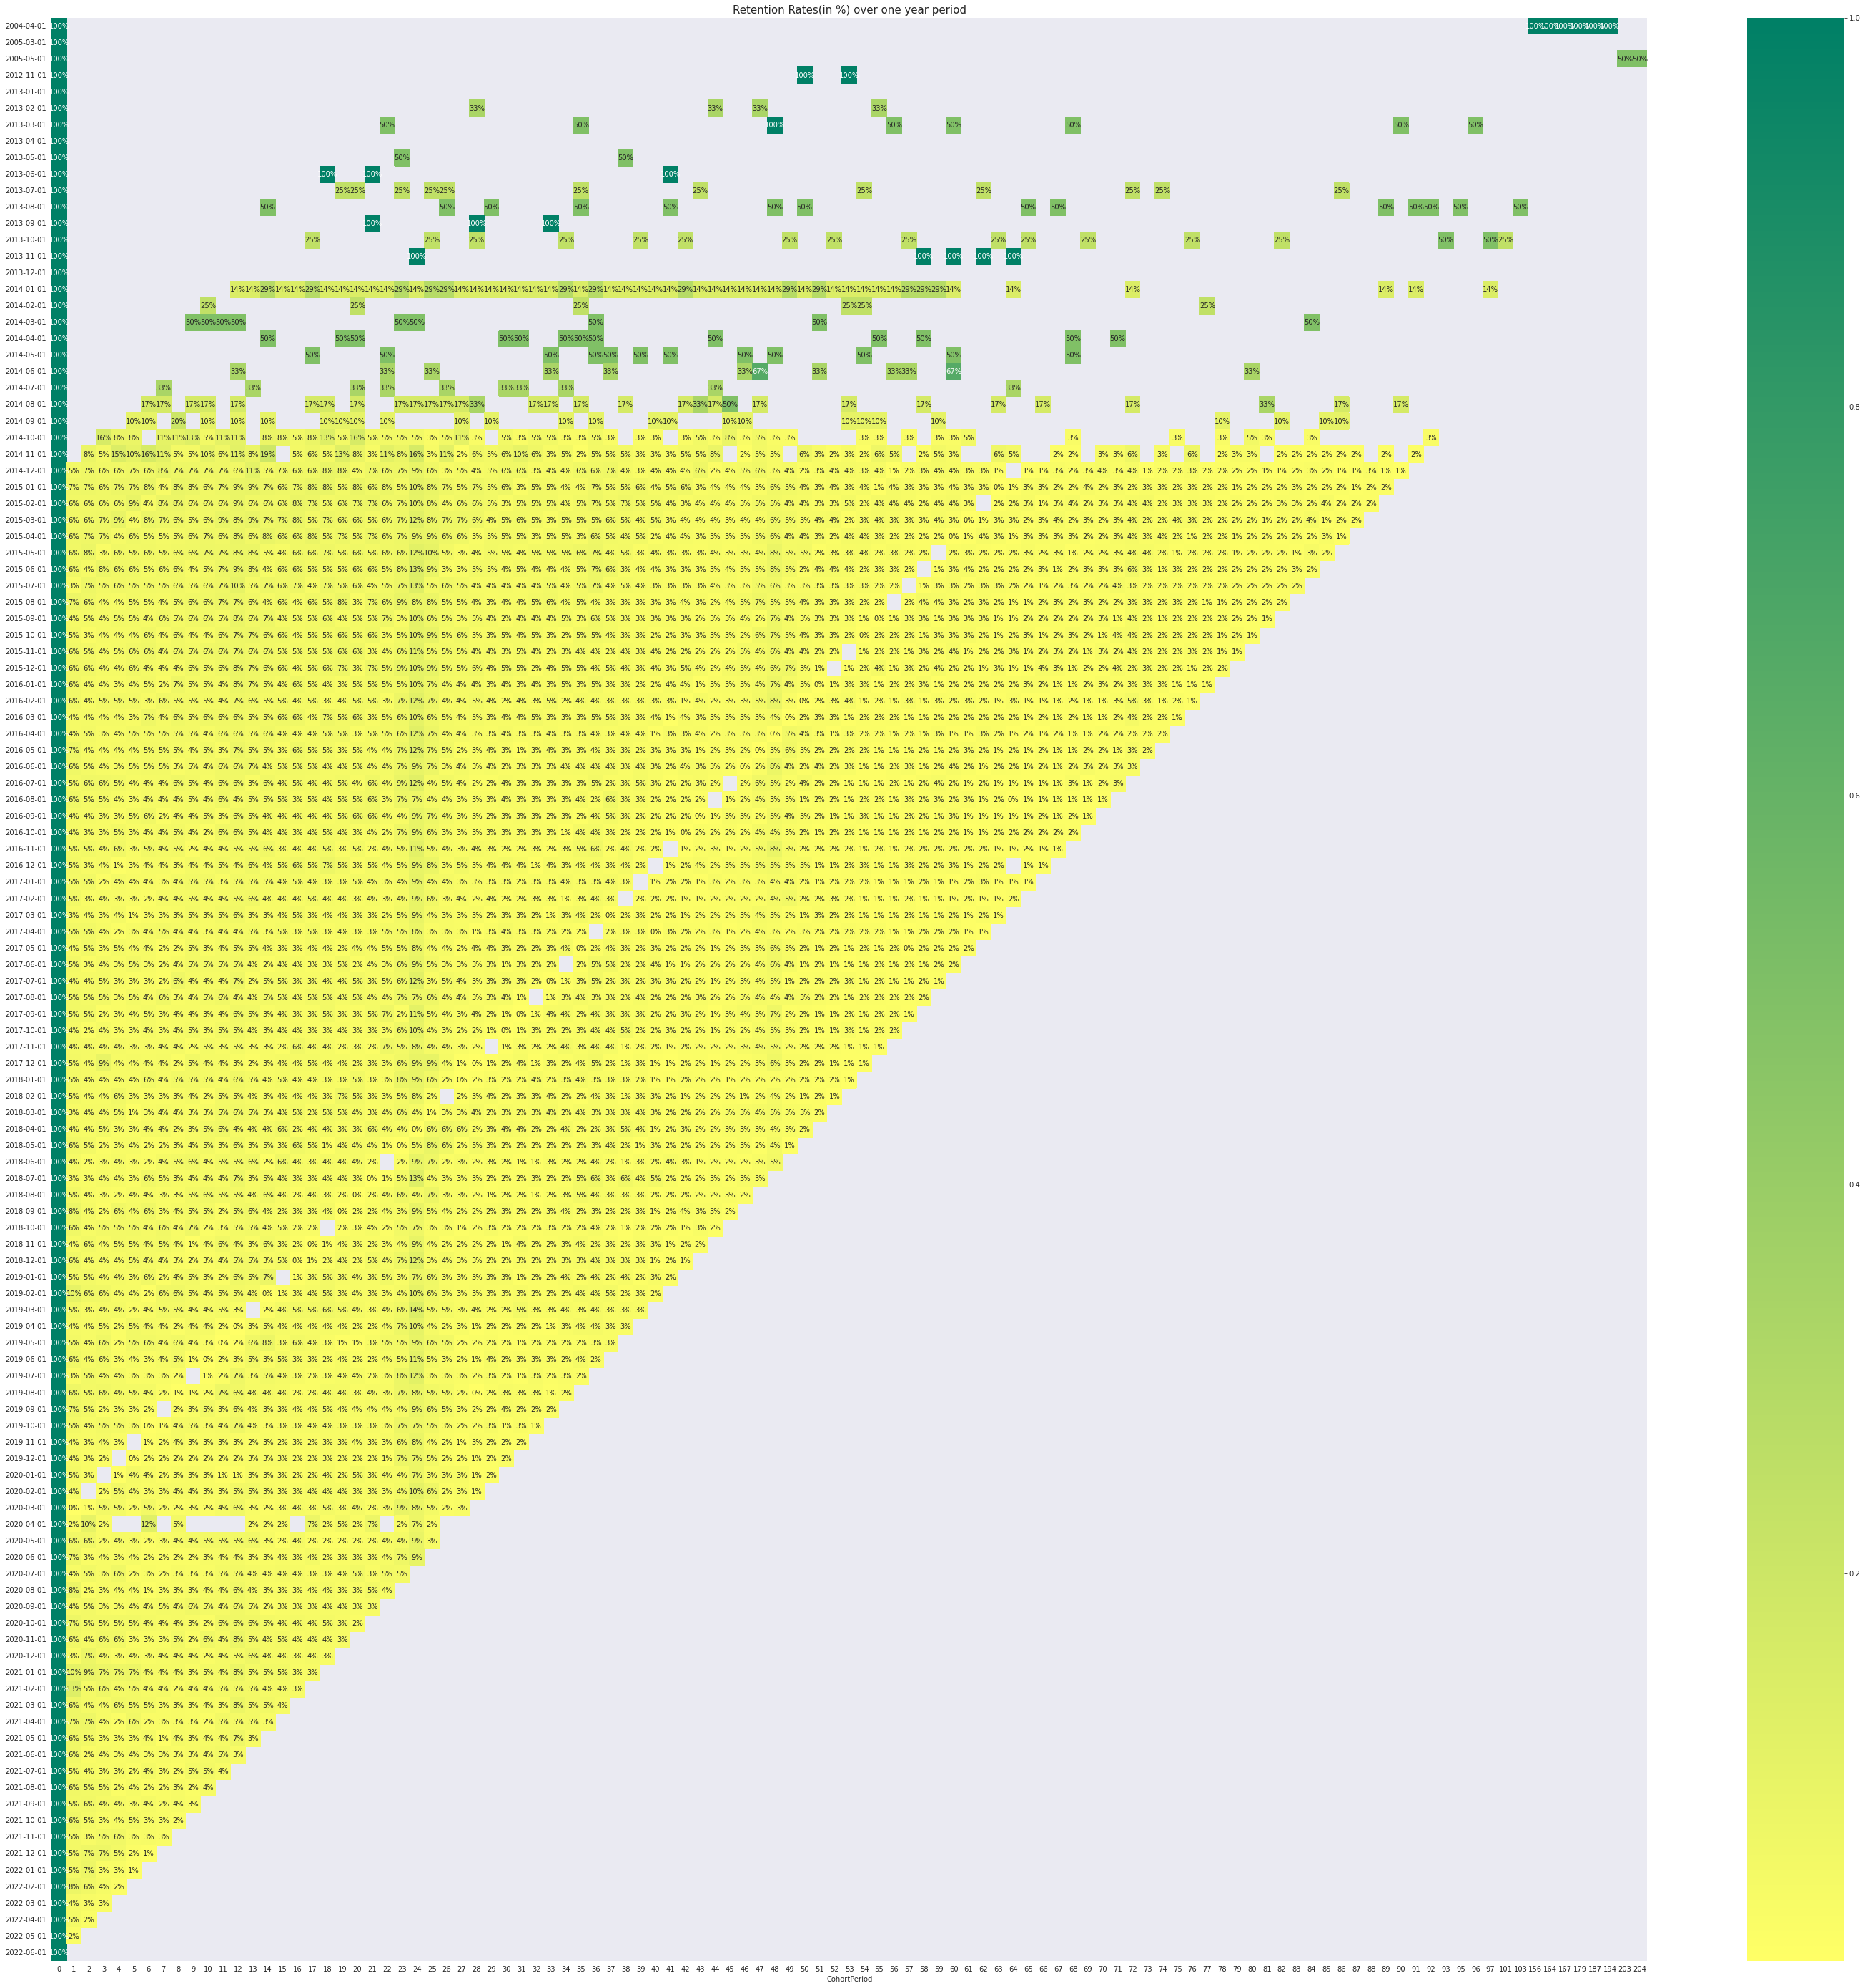

In [ ]:
#Build the heatmap or pictorial representation of above table

plt.figure(figsize=(50, 50))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="summer_r")
plt.show()
# lo mismo que lo anterior pero con un heatmap. 
# tengo que hacerlo por años salen muchos meses, aparte de quitar los años anteriores al 2015

In [ ]:
amount_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortPeriod', values='Fact_total', aggfunc='mean').round(2)
# aqui utilizamos cantidad la aggfunc es la media.
amount_cohort
# aqui estamos sacando la facturación media por paso de clientes en cada fecha. 

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,95,96,97,101,103,156,164,167,179,187,194,203,204
CohortMonth,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-04-01,164.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,572.52,314.67,437.2,275.78,686.98,860.29,NaN,NaN
2005-03-01,28.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-01,261.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.69,143.16
2012-11-01,116.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,385.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,351.96,224.24,379.18,204.60,370.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01,315.33,331.81,345.61,225.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,342.50,216.42,222.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# RFM ANALISIS

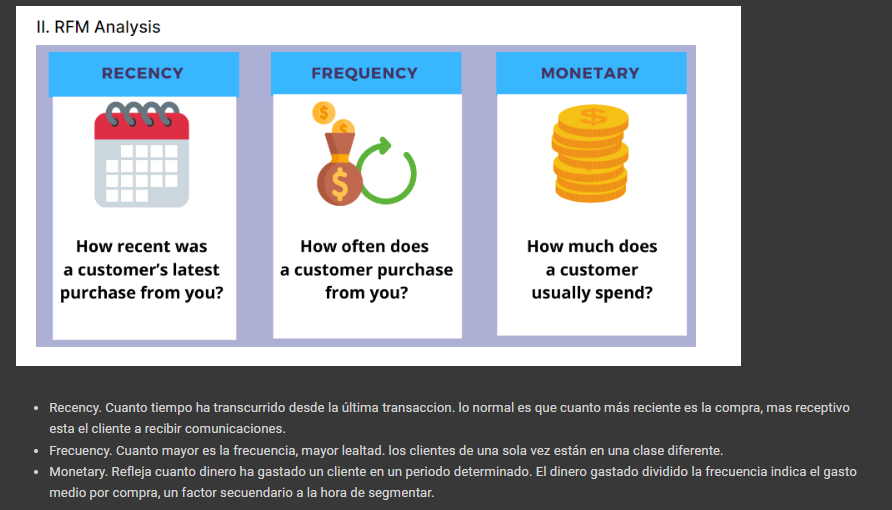

In [ ]:
df_rfm = df.copy() # hacemos la copia del original. 

In [ ]:
# extracting the RECENCY

recency = pd.DataFrame(df_rfm.groupby('Bastidor')['Fecha_Apertura'].max().reset_index())
# creamos la variable recency
recency['Fecha_Apertura'] = pd.to_datetime(recency['Fecha_Apertura']).dt.date # convertimos a fecha InvoiceDate
recency['MaxDate'] = recency['Fecha_Apertura'].max() # sacamos el valor maximo
recency['recency'] = (recency['MaxDate'] - recency['Fecha_Apertura']).dt.days + 1 # diferencia entre la fecha maxima de todas las facturas y la fecha maxima del bastidor en cuestión. 
recency = recency[['Bastidor','recency']] # elegimos las variables a mostrar. 
recency.head()

,Bastidor,recency
0,WAUZZZ4L97D07664,629
1,WAUZZZ8E55A50910,1676
2,WAUZZZ8P07A02124,385
3,WAUZZZ8P1CA04845,2275
4,WAUZZZ8T4EA06800,836


In [ ]:
# extracting the FREQUENCY

frequency = pd.DataFrame(df_rfm.groupby('Bastidor')['Orden_Corta2'].nunique().reset_index())
frequency.columns = ['fBastidor','frequency']
frequency.head()

,fBastidor,frequency
0,WAUZZZ4L97D07664,5
1,WAUZZZ8E55A50910,1
2,WAUZZZ8P07A02124,2
3,WAUZZZ8P1CA04845,1
4,WAUZZZ8T4EA06800,6


In [ ]:
# extracting the MONETARY

monetary = pd.DataFrame(df_rfm.groupby('Bastidor')['Fact_total'].sum().reset_index())
monetary.columns = ['mBastidor','monetary']
monetary.head()

,mBastidor,monetary
0,WAUZZZ4L97D07664,1233.45
1,WAUZZZ8E55A50910,1144.53
2,WAUZZZ8P07A02124,757.33
3,WAUZZZ8P1CA04845,208.16
4,WAUZZZ8T4EA06800,4483.83


In [ ]:
# combining the three into one table

rfm = pd.concat([recency,frequency,monetary], axis=1) # este es el nombre de cada dataframe
rfm.drop(['fBastidor',"mBastidor"], axis=1, inplace=True)
rfm.head(10)

,Bastidor,recency,frequency,monetary
0,WAUZZZ4L97D07664,629,5,1233.45
1,WAUZZZ8E55A50910,1676,1,1144.53
2,WAUZZZ8P07A02124,385,2,757.33
3,WAUZZZ8P1CA04845,2275,1,208.16
4,WAUZZZ8T4EA06800,836,6,4483.83
5,WAUZZZ8TX8A00452,1688,1,156.80
6,WAUZZZ8X1EB11477,2190,1,261.59
7,WAUZZZ8X3HB04230,1017,1,388.49
8,WVWZZZ3CZ6E13699,2002,1,826.76
9,000000000FC001550,2500,1,36.66


- Hemos extraido los tres pilares de RFM. Aunque odemos calcular más variables.
- por ejemplo podríamos crear la velocidad de la visita. es decir cada cuanto tiempo viene. 
    - ejemplo. supongamos que un cliente visita una tienda 10 veces al año, su frecuencia es de 10. compra algunos artículos por valor de 3000 en sus 10 visitas. el valor monetario es de 3000.
        - con 10 visitas tenemos diez fechas. lo que hacemos es restar la fecha de la fecha anterior para obtener después de cuantos días vuelve a visitar. obtenemos 9 fechas de 10. tomamos la media de esos 9 valores y esa es nuestra velocidad d

In [ ]:
#LO QUE VAMOS A SACAR EL EL PROMEDI ENTRE VISITA Y VISITA. 
# extracting SPEED OF VISIT

Bastidor_list = list(df_rfm.Bastidor.unique()) # creamos una lista con unicos de BAstidor
c = [] # abrimos las lista c
v = [] # abrimos la lista v
for ids in Bastidor_list:  # vamos a recorrer la lista de arriba. es decir la columna de Bastidores
    sov = df_rfm[df_rfm['Bastidor']==ids].groupby('Fecha_Apertura')['Orden_Corta2'].count().reset_index()
    # generamos la variable sov que es igual a: buscamos dentro del dataframe df_rfm.Bastidor que sea igual a alguno de los valores de nuestra lista de unicos
    # lo agrupamos por Fecha_Apertura e Orden_Corta2 y contamos. 
    if sov.shape[0]>3: # si sov es mayor que 3
        sov['Fecha_Apertura1'] = sov['Fecha_Apertura'].shift(1) # generamos Fecha_Apertura1 que es el dato desplazado una posición
        sov['Difference'] = (sov['Fecha_Apertura']-sov['Fecha_Apertura1']).dt.days # generamos otra difference que es la diferencia entre Fecha_Apertura y el desplazamiento
        mean_days = round(sov.Difference.mean(),0) # aqui sacamos la media
        c.append(ids) # metemos lso datos en la lsita 
        v.append(mean_days) # meetemos los datos en la lista. 
    else: # sino es mayor que 3
        c.append(ids)
        v.append(0)
speed_of_visit = pd.DataFrame() # generamos dataframe
speed_of_visit['sBastidor'] = c # generam,os variable
speed_of_visit['sov'] = v # generamios varialbe
speed_of_visit = speed_of_visit.sort_values('sBastidor').reset_index(drop=True) # ordenamos
speed_of_visit.head()

,sBastidor,sov
0,WAUZZZ4L97D07664,452.0
1,WAUZZZ8E55A50910,0.0
2,WAUZZZ8P07A02124,0.0
3,WAUZZZ8P1CA04845,0.0
4,WAUZZZ8T4EA06800,211.0


In [ ]:
speed_of_visit.to_csv("/content/drive/MyDrive/Colab Notebooks/speed_of_visit.csv")

In [ ]:
df_rfm.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

In [ ]:
# checking the overall highlights. The number of distinct customers are 4334
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58009 entries, 0 to 58008
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bastidor   58009 non-null  object 
 1   recency    58009 non-null  int64  
 2   frequency  58009 non-null  int64  
 3   monetary   58009 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ MB


In [ ]:
# checking the summary
rfm.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,recency,frequency,monetary
count,58009.000000,58009.000000,5.800900e+04
mean,1032.668396,3.111259,1.647268e+03
std,801.510613,3.562207,5.798476e+03
min,1.000000,1.000000,0.000000e+00
25%,302.000000,1.000000,2.491900e+02
50%,888.000000,2.000000,7.510300e+02
75%,1688.000000,4.000000,2.007120e+03
90%,2253.000000,7.000000,4.123256e+03
95%,2486.000000,9.000000,5.877614e+03
99%,2695.000000,13.000000,1.074724e+04


- ahora el objetivo es categorizar a los clientes en función de su valor. 
- los vamos a etiquetas 1-5, siendo el 1 el más bajo y el 5 el mas alto. hacemos cortes del 25, 50, 75, y 90% para distribuirlos en 5 categorias. 
- despues de eso sumamos estos valores para cada vila y etiquetamos la columna como puntuacion, que tiene valores que oscilan entre 3 y 15.
- despues de eso hacemos cortes en la puntuación al 25, 50, 75, y 90% para categorizarlos en Malos, Bronce, Plata, Oro y Platino.
- los cortes se pueden hacer de muchas maneras, habría que hablar con el cliente.
